In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

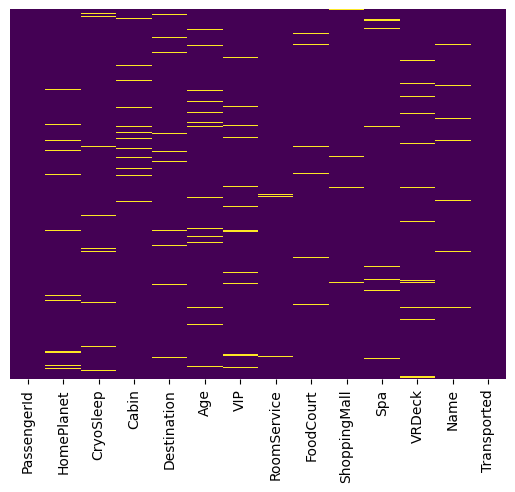

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: xlabel='Transported', ylabel='count'>

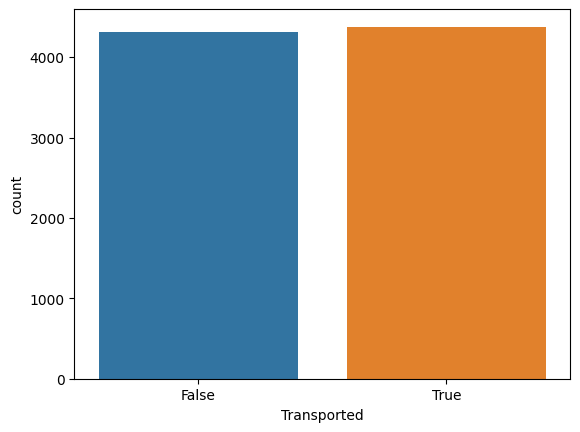

In [11]:
sns.countplot(train,x='Transported')

In [12]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [13]:
train['Transported'] = train[["Transported"]].astype(int)

In [14]:
homeplanet = pd.get_dummies(train.HomePlanet,drop_first =True).astype(int)
cryosleep = pd.get_dummies(train.CryoSleep, drop_first=True).astype(int)
destination = pd.get_dummies(train.Destination, drop_first=True).astype(int)

In [15]:
train.drop([ 'HomePlanet', 'CryoSleep', 'Destination'], axis=1, inplace=True)

In [16]:
train = pd.concat([train,homeplanet, cryosleep, destination], axis=1)

In [17]:
train.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa,Mars,True,PSO J318.5-22,TRAPPIST-1e
0,0001_01,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0,0,0,1
1,0002_01,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,0,0,0,1
2,0003_01,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,0,0,0,1
3,0003_02,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,0,0,0,1
4,0004_01,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,0,0,0,1


In [18]:
train.rename(columns={True: 'CryoSleep'}, inplace=True)

In [19]:
vip = pd.get_dummies(train.VIP, drop_first=True).astype(int)

In [20]:
train.drop(['VIP'], axis=1, inplace=True)

In [21]:
train = pd.concat([train,vip], axis=1)

In [22]:
train.rename(columns={True: 'VIP'}, inplace=True)

In [23]:
train.columns

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Europa',
       'Mars', 'CryoSleep', 'PSO J318.5-22', 'TRAPPIST-1e', 'VIP'],
      dtype='object')

In [24]:
new_order = [  'PassengerId', 'Cabin','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Europa','Mars',
                  "CryoSleep", 'VIP','PSO J318.5-22','TRAPPIST-1e', 'Transported']

In [25]:
train = train[new_order]

In [26]:
train.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Europa,Mars,CryoSleep,VIP,PSO J318.5-22,TRAPPIST-1e,Transported
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0,0,0,0,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,0,0,0,0,1,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,0,0,1,0,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0,0,0,0,1,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,0,0,0,0,1,1


In [27]:
train.drop(['Cabin','Name'],axis=1,inplace=True)

In [28]:
train.Age

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

<Axes: xlabel='Transported', ylabel='Age'>

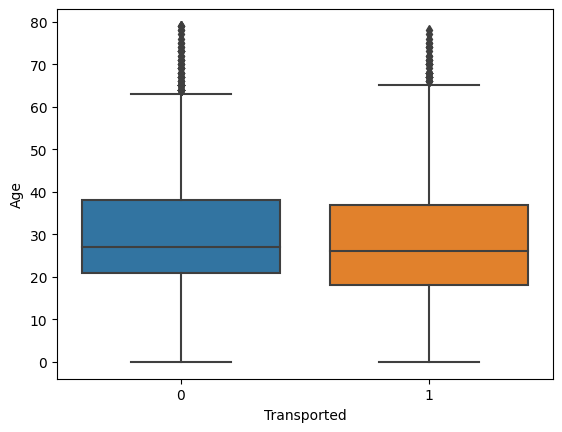

In [29]:
sns.boxplot(train,x='Transported',y='Age')

In [30]:
train.isnull().sum()

PassengerId        0
Age              179
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Europa             0
Mars               0
CryoSleep          0
VIP                0
PSO J318.5-22      0
TRAPPIST-1e        0
Transported        0
dtype: int64

In [31]:
# train['PassengerId'] = train[["PassengerId"]].astype(int)

In [32]:
train.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,CryoSleep,VIP,PSO J318.5-22,TRAPPIST-1e,Transported
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,0,1,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,0,1,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,0,1,1


In [33]:
mode_values = train.mode().iloc[0]

# Fill NaN values with the mode
train.fillna(mode_values, inplace=True)

<Axes: >

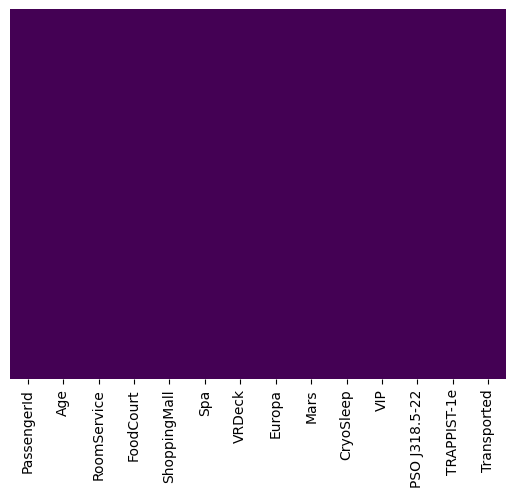

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
train.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Europa', 'Mars', 'CryoSleep', 'VIP', 'PSO J318.5-22',
       'TRAPPIST-1e', 'Transported'],
      dtype='object')

In [36]:
X_train = train[['Europa','Mars','CryoSleep', 'VIP']]
y_train = train['Transported']

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [38]:
# May take awhile!
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<Axes: >

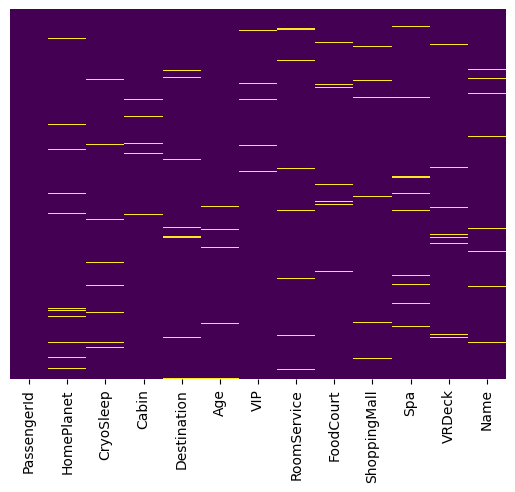

In [40]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
homeplanet = pd.get_dummies(test.HomePlanet,drop_first =True).astype(int)
cryosleep = pd.get_dummies(test.CryoSleep, drop_first=True).astype(int)
destination = pd.get_dummies(test.Destination, drop_first=True).astype(int)

In [42]:
test.drop([ 'HomePlanet', 'CryoSleep', 'Destination'], axis=1, inplace=True)

In [43]:
test = pd.concat([test,homeplanet, cryosleep, destination], axis=1)

In [44]:
test.rename(columns={True: 'CryoSleep'}, inplace=True)

In [45]:
vip = pd.get_dummies(test.VIP, drop_first=True).astype(int)

In [46]:
test.drop(['VIP'], axis=1, inplace=True)

In [47]:
test = pd.concat([test,vip], axis=1)

In [48]:
test.rename(columns={True: 'VIP'}, inplace=True)

In [49]:
test.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Europa,Mars,CryoSleep,PSO J318.5-22,TRAPPIST-1e,VIP
0,0013_01,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,0,1,0,1,0
1,0018_01,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0,0,0,1,0
2,0019_01,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,1,0,0,0
3,0021_01,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,0,0,0,1,0
4,0023_01,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0,0,0,1,0


In [50]:
test.drop(['Cabin','Name'],axis=1,inplace=True)

In [51]:
new_order = [  'PassengerId','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Europa','Mars',
                  "CryoSleep", 'VIP','PSO J318.5-22','TRAPPIST-1e']

test = test[new_order]

In [52]:
# train['PassengerId'] = train[["PassengerId"]].astype(int)

In [53]:
mode_values = test.mode().iloc[0]

# Fill NaN values with the mode
test.fillna(mode_values, inplace=True)

In [54]:
test.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Europa', 'Mars', 'CryoSleep', 'VIP', 'PSO J318.5-22',
       'TRAPPIST-1e'],
      dtype='object')

In [55]:
X_test  = test[['Europa','Mars','CryoSleep', 'VIP']]

In [56]:
pred = rfc.predict(X_test)

In [57]:
pred

array([1, 0, 1, ..., 1, 0, 1])

In [58]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': pred})

In [59]:
output

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,0


In [60]:
output.to_csv('submission.csv', index=False)